# Steps for making report final project


1.   Reading and Understanding Data
2.   Exploratory Data Analysis
        - Data Cleaning
        - Univariate Analysis
        - Bivariate Analysis
        - Multivariate Analysis
3.   Outliers Treatment
4.   Scaling Data
5.   Creating k means clustering and visualizing clusters formed
6.   Report countries








##  Reading and Understanding Data

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
df = sns.load_dataset('tips')
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [ ]:
df.shape

(244, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.3 KB


In [ ]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


## EDA

#### Univariate analysis

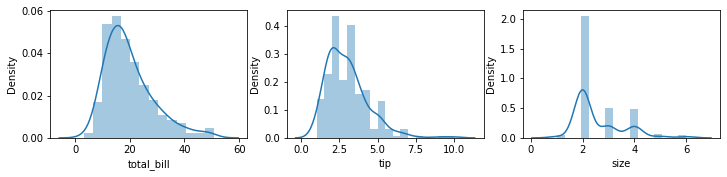

In [ ]:
plt.figure(figsize=(12,8))

for i in enumerate(df.describe().columns):
  plt.subplot(3,3, i[0]+1)
  sns.distplot(df[i[1]])
plt.show()

#### Bivariate



In [ ]:
tip = df.sort_values('tip', ascending=False)
tip

,total_bill,tip,sex,smoker,day,time,size
170,50.81,10.00,Male,Yes,Sat,Dinner,3
212,48.33,9.00,Male,No,Sat,Dinner,4
23,39.42,7.58,Male,No,Sat,Dinner,4
59,48.27,6.73,Male,No,Sat,Dinner,4
141,34.30,6.70,Male,No,Thur,Lunch,6
...,...,...,...,...,...,...,...
0,16.99,1.01,Female,No,Sun,Dinner,2
236,12.60,1.00,Male,Yes,Sat,Dinner,2
111,7.25,1.00,Female,No,Sat,Dinner,1
67,3.07,1.00,Female,Yes,Sat,Dinner,1


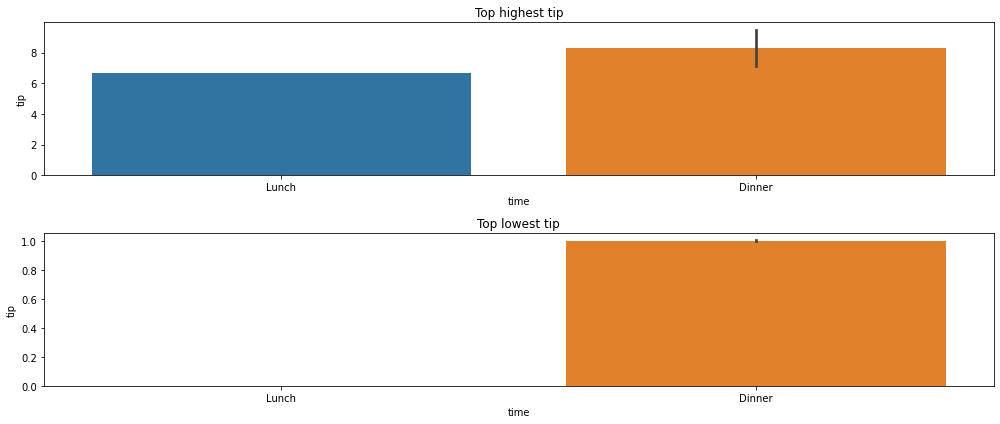

In [ ]:
plt.figure(figsize=(14,6))
plt.subplot(2,1,1)
sns.barplot(tip.time.head(), tip.tip.head())
plt.title('Top highest tip')
plt.subplot(2,1,2)
sns.barplot(tip.time.tail(), tip.tip.tail())
plt.title('Top lowest tip')
plt.tight_layout()
plt.show()

#### Multivariate

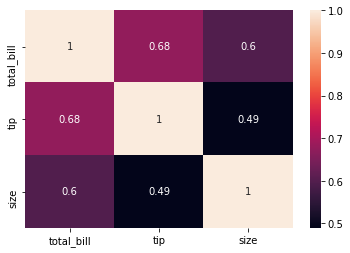

In [ ]:
sns.heatmap(df.corr(), annot=True, fmt='.2g');

##vOutlier Treatment

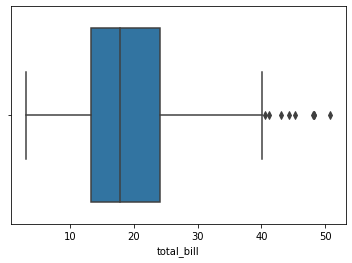

In [ ]:
sns.boxplot('total_bill', data=df)

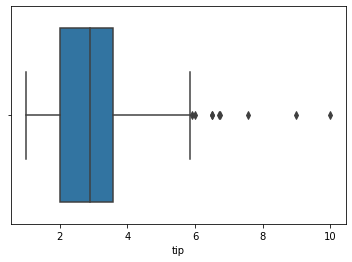

In [ ]:
sns.boxplot('tip', data=df);

In [ ]:
def finding_outlier(df):
  Q1 = df.quantile(0.25)
  Q3 = df.quantile(0.75)
  IQR  = Q3-Q1
  df_final = df[(df<(Q1-(1.5*IQR))) | (df>(Q3+(1.5*IQR)))]
  return df_final

In [ ]:
print(finding_outlier(df['total_bill']))
print(finding_outlier(df['tip']))

59     48.27
102    44.30
142    41.19
156    48.17
170    50.81
182    45.35
184    40.55
197    43.11
212    48.33
Name: total_bill, dtype: float64
23      7.58
47      6.00
59      6.73
141     6.70
170    10.00
183     6.50
212     9.00
214     6.50
239     5.92
Name: tip, dtype: float64


In [ ]:
def remove_outlier(df):
  Q1 = df.quantile(0.25)
  Q3 = df.quantile(0.75)
  IQR  = Q3-Q1
  df_final = df[~(df>(Q1-(1.5*IQR))) | (df<(Q3+(1.5*IQR)))]
  return df_final

In [ ]:
df2 = remove_outlier(df[['total_bill', 'tip']])

df2.dropna(axis=0, inplace=True)
df2

,total_bill,tip
0,16.99,1.01
1,10.34,1.66
2,21.01,3.50
3,23.68,3.31
4,24.59,3.61
...,...,...
238,35.83,4.67
240,27.18,2.00
241,22.67,2.00
242,17.82,1.75


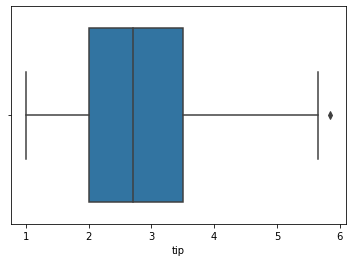

In [ ]:
sns.boxplot('tip', data=df2);

In [ ]:
df2['total_bill'].unique()

array([16.99, 10.34, 21.01, 23.68, 24.59, 25.29,  8.77, 26.88, 15.04,
       14.78, 10.27, 35.26, 15.42, 18.43, 14.83, 21.58, 10.33, 16.29,
       16.97, 20.65, 17.92, 20.29, 15.77, 19.82, 17.81, 13.37, 12.69,
       21.7 , 19.65,  9.55, 18.35, 15.06, 20.69, 17.78, 24.06, 16.31,
       16.93, 18.69, 31.27, 16.04, 17.46, 13.94,  9.68, 30.4 , 18.29,
       22.23, 28.55, 18.04, 12.54, 10.29, 34.81,  9.94, 25.56, 19.49,
       38.01, 26.41, 11.24, 13.81, 11.02, 17.59, 20.08, 16.45,  3.07,
       20.23, 15.01, 12.02, 17.07, 26.86, 25.28, 14.73, 10.51, 27.2 ,
       22.76, 17.29, 19.44, 16.66, 10.07, 32.68, 15.98, 34.83, 13.03,
       18.28, 24.71, 21.16, 28.97, 22.49,  5.75, 16.32, 22.75, 40.17,
       27.28, 12.03, 12.46, 11.35, 15.38, 22.42, 20.92, 15.36, 20.49,
       25.21, 18.24, 14.31, 14.  ,  7.25, 38.07, 23.95, 25.71, 17.31,
       29.93, 10.65, 12.43, 24.08, 11.69, 13.42, 14.26, 15.95, 12.48,
       29.8 ,  8.52, 14.52, 11.38, 22.82, 19.08, 20.27, 11.17, 12.26,
       18.26,  8.51,

## Scaling Data

In [ ]:
#feature scaling

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
df_std = sc.fit_transform(df2)

In [ ]:
#clustering with KMeans

from sklearn.cluster import KMeans

kmeans1 = KMeans(n_clusters = 2, random_state=42).fit(df_std)
labels1 = kmeans1.labels_
labels1

array([0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0], dtype=int32)

In [ ]:
new_df = pd.DataFrame(data=df_std, columns=['total_bill', 'tip'])
new_df['label1_kmeans'] = labels1
new_df

,total_bill,tip,label1_kmeans
0,-0.206593,-1.658889,0
1,-1.130586,-1.058623,0
2,0.351971,0.640593,1
3,0.722957,0.465131,1
4,0.849399,0.742177,1
...,...,...,...
224,2.411155,1.721073,1
225,1.209269,-0.744637,1
226,0.582622,-0.744637,0
227,-0.091268,-0.975509,0


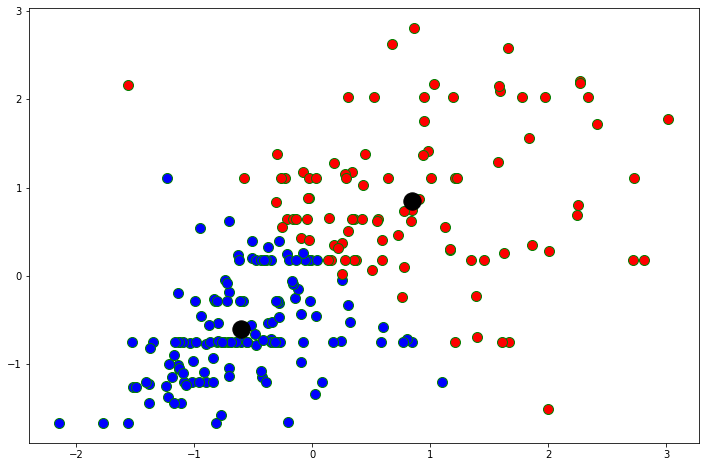

In [ ]:
plt.figure(figsize=(12,8))

plt.scatter(new_df['total_bill'][new_df.label1_kmeans==0], new_df['tip'][new_df.label1_kmeans==0], c='blue', s=100, edgecolors='green')
plt.scatter(new_df['total_bill'][new_df.label1_kmeans==1], new_df['tip'][new_df.label1_kmeans==1], c='red', s=100, edgecolors='green')

plt.scatter(kmeans1.cluster_centers_[:,0], kmeans1.cluster_centers_[:,0], c='k', s=300)

plt.show()

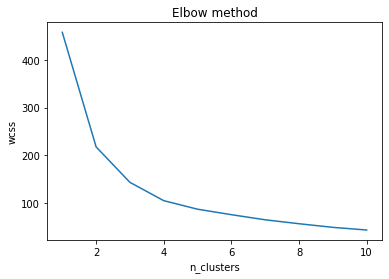

In [ ]:
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(df_std)
  wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss)
plt.title('Elbow method')
plt.xlabel('n_clusters')
plt.ylabel('wcss')

plt.show()

In [ ]:
kmeans2 = KMeans(n_clusters = 4, init='k-means++', random_state=42)
kmeans2.fit(df_std)
labels2 = kmeans2.labels_


In [ ]:
new_df['label2_kmeans'] = labels2
new_df

,total_bill,tip,label1_kmeans,label2_kmeans
0,-0.206593,-1.658889,0,1
1,-1.130586,-1.058623,0,1
2,0.351971,0.640593,1,3
3,0.722957,0.465131,1,3
4,0.849399,0.742177,1,3
...,...,...,...,...
224,2.411155,1.721073,1,0
225,1.209269,-0.744637,1,2
226,0.582622,-0.744637,0,2
227,-0.091268,-0.975509,0,1


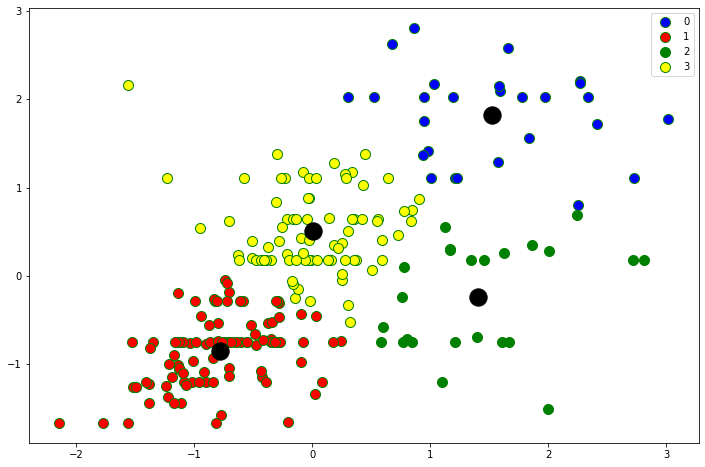

In [ ]:
plt.figure(figsize=(12,8))

plt.scatter(new_df['total_bill'][new_df.label2_kmeans==0], new_df['tip'][new_df.label2_kmeans==0], label='0', c='blue', s=100, edgecolors='green')
plt.scatter(new_df['total_bill'][new_df.label2_kmeans==1], new_df['tip'][new_df.label2_kmeans==1], label='1', c='red', s=100, edgecolors='green')
plt.scatter(new_df['total_bill'][new_df.label2_kmeans==2], new_df['tip'][new_df.label2_kmeans==2], label='2', c='green', s=100, edgecolors='green')
plt.scatter(new_df['total_bill'][new_df.label2_kmeans==3], new_df['tip'][new_df.label2_kmeans==3], label ='3', c='yellow', s=100, edgecolors='green')

plt.scatter(kmeans2.cluster_centers_[:,0], kmeans2.cluster_centers_[:,1], c='k', s=300)
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score

print(silhouette_score(df_std, labels= labels1))
print(silhouette_score(df_std, labels= labels2))

0.45269332601784357
0.4638353033975313


Inverse Transform

In [ ]:
from sklearn.cluster import KMeans
kmeansa = KMeans(n_clusters = 2, random_state=42).fit(sc.inverse_transform(df_std))
labelsa = kmeansa.labels_
labelsa

array([0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0], dtype=int32)

In [ ]:
kmeansb = KMeans(n_clusters = 4, init='k-means++', random_state=42).fit(df_std)
labelsb = kmeansb.labels_
labelsb

array([1, 1, 3, 3, 3, 0, 1, 2, 1, 3, 1, 0, 1, 3, 3, 3, 1, 3, 3, 3, 3, 3,
       1, 3, 1, 1, 1, 3, 3, 1, 3, 3, 3, 3, 3, 1, 3, 1, 0, 1, 3, 3, 1, 0,
       3, 0, 2, 3, 1, 1, 0, 1, 0, 3, 2, 2, 1, 3, 1, 1, 3, 3, 3, 1, 1, 1,
       1, 1, 3, 2, 0, 1, 1, 3, 0, 3, 3, 3, 3, 1, 0, 1, 0, 1, 3, 0, 3, 2,
       3, 1, 3, 3, 0, 0, 1, 3, 1, 1, 3, 3, 3, 1, 3, 0, 3, 3, 3, 1, 0, 2,
       0, 3, 0, 1, 1, 2, 1, 1, 1, 1, 1, 0, 1, 1, 1, 2, 1, 3, 1, 1, 3, 1,
       1, 1, 1, 1, 3, 0, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 1, 0, 3, 1, 1, 3,
       1, 1, 1, 3, 3, 3, 0, 1, 1, 3, 3, 2, 3, 2, 1, 1, 3, 2, 0, 0, 0, 3,
       2, 3, 3, 1, 3, 2, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 3, 3, 2, 2, 2, 1,
       2, 0, 1, 1, 2, 1, 1, 2, 1, 3, 1, 3, 1, 1, 1, 3, 1, 3, 2, 3, 3, 1,
       3, 1, 1, 2, 0, 2, 2, 1, 3], dtype=int32)

In [ ]:
new_df1 = pd.DataFrame(data=sc.inverse_transform(df_std), columns=['total_bill', 'tip'])
new_df1['label1_kmeans'] = labelsa
new_df1['label2_kmeans'] = labelsb
new_df1

,total_bill,tip,label1_kmeans,label2_kmeans
0,16.99,1.01,0,1
1,10.34,1.66,0,1
2,21.01,3.50,0,3
3,23.68,3.31,1,3
4,24.59,3.61,1,3
...,...,...,...,...
224,35.83,4.67,1,0
225,27.18,2.00,1,2
226,22.67,2.00,1,2
227,17.82,1.75,0,1


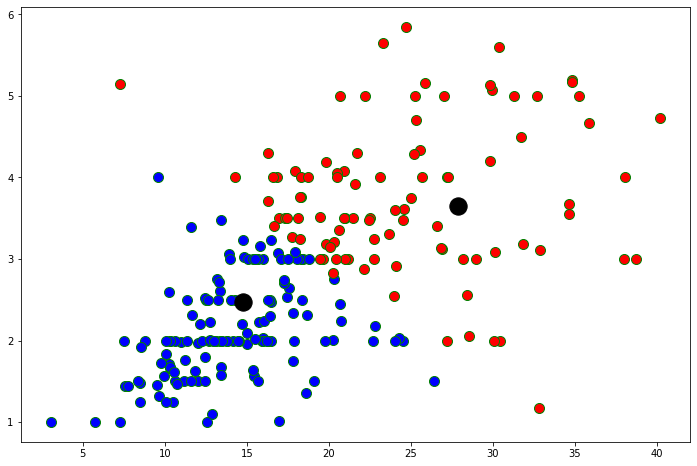

In [ ]:
plt.figure(figsize=(12,8))

plt.scatter(new_df1['total_bill'][new_df1.label1_kmeans == 0], new_df1['tip'][new_df1.label1_kmeans == 0], c='blue', s=100, edgecolor='green')
plt.scatter(new_df1['total_bill'][new_df1.label1_kmeans == 1], new_df1['tip'][new_df1.label1_kmeans == 1], c='red', s=100, edgecolor='green')

plt.scatter(kmeansa.cluster_centers_[:, 0],kmeansa.cluster_centers_[:, 1], c='k', s=300 )

plt.show()

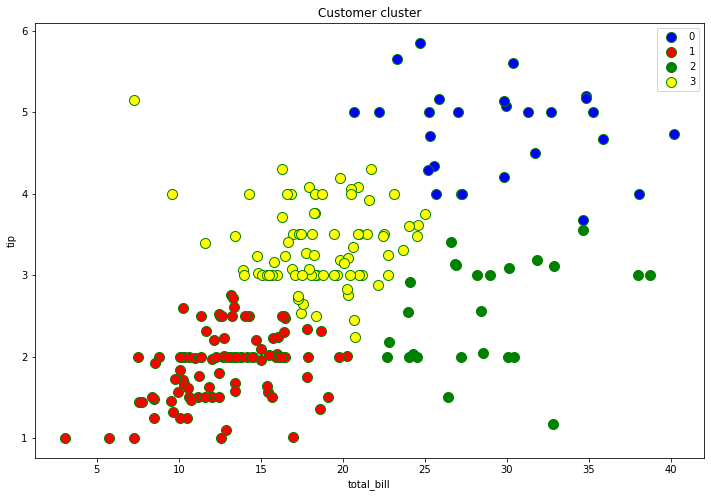

In [ ]:
plt.figure(figsize=(12,8))

plt.scatter(new_df1['total_bill'][new_df1.label2_kmeans == 0], new_df1['tip'][new_df1.label2_kmeans == 0], c='blue', label='0', s=100, edgecolor='green')
plt.scatter(new_df1['total_bill'][new_df1.label2_kmeans == 1], new_df1['tip'][new_df1.label2_kmeans == 1], c='red', label='1', s=100, edgecolor='green')
plt.scatter(new_df1['total_bill'][new_df1.label2_kmeans == 2], new_df1['tip'][new_df1.label2_kmeans == 2], c='green',label = '2', s=100, edgecolor='green')
plt.scatter(new_df1['total_bill'][new_df1.label2_kmeans == 3], new_df1['tip'][new_df1.label2_kmeans == 3], c='yellow', label = '3', s=100, edgecolor='green')

# plt.scatter(kmeansb.cluster_centers_[:, 0],kmeansb.cluster_centers_[:, 1], c='k', s=300 )
plt.legend()
plt.title('Customer cluster')
plt.xlabel('total_bill')
plt.ylabel('tip')
plt.show()

In [ ]:
#summary

df['K_means_labels'] = pd.Series(labelsb).astype('object')

In [ ]:
df

,total_bill,tip,sex,smoker,day,time,size,K_means_labels
0,16.99,1.01,Female,No,Sun,Dinner,2,1
1,10.34,1.66,Male,No,Sun,Dinner,3,1
2,21.01,3.50,Male,No,Sun,Dinner,3,3
3,23.68,3.31,Male,No,Sun,Dinner,2,3
4,24.59,3.61,Female,No,Sun,Dinner,4,3
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,NaN
240,27.18,2.00,Female,Yes,Sat,Dinner,2,NaN
241,22.67,2.00,Male,Yes,Sat,Dinner,2,NaN
242,17.82,1.75,Male,No,Sat,Dinner,2,NaN


In [ ]:
#filtering

In [ ]:
top_tip = df[df['K_means_labels']==0]

In [ ]:
top_tip

,total_bill,tip,sex,smoker,day,time,size,K_means_labels
5,25.29,4.71,Male,No,Sun,Dinner,4,0
11,35.26,5.00,Female,No,Sun,Dinner,4,0
38,18.69,2.31,Male,No,Sat,Dinner,3,0
43,9.68,1.32,Male,No,Sun,Dinner,2,0
45,18.29,3.00,Male,No,Sun,Dinner,2,0
50,12.54,2.50,Male,No,Sun,Dinner,2,0
52,34.81,5.20,Female,No,Sun,Dinner,4,0
70,12.02,1.97,Male,No,Sat,Dinner,2,0
74,14.73,2.20,Female,No,Sat,Dinner,2,0
80,19.44,3.00,Male,Yes,Thur,Lunch,2,0


In [ ]:
top_tip.sort_values(by=['tip'],ascending=False)[:10]

,total_bill,tip,sex,smoker,day,time,size,K_means_labels
52,34.81,5.20,Female,No,Sun,Dinner,4,0
85,34.83,5.17,Female,No,Thur,Lunch,4,0
172,7.25,5.15,Male,Yes,Sun,Dinner,2,0
11,35.26,5.00,Female,No,Sun,Dinner,4,0
5,25.29,4.71,Male,No,Sun,Dinner,4,0
93,16.32,4.30,Female,Yes,Fri,Dinner,2,0
174,16.82,4.00,Male,Yes,Sun,Dinner,2,0
112,38.07,4.00,Male,No,Sun,Dinner,3,0
108,18.24,3.76,Male,No,Sat,Dinner,2,0
160,21.50,3.50,Male,No,Sun,Dinner,4,0


In [ ]:
df3 = remove_outlier(df[['total_bill', 'tip', 'size']])
df3.dropna(axis=0, inplace=True)

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
df_std = sc.fit_transform(df3.astype(float))

In [ ]:
kmeans3 = KMeans(n_clusters = 4, init='k-means++', random_state=42).fit(df_std)
labels3 = kmeans3.labels_

In [ ]:
new_df = pd.DataFrame(data=df_std, columns=['total_bill', 'tip', 'size'])
new_df['label3_kmeans'] = labels3
new_df

,total_bill,tip,size,label3_kmeans
0,-0.314711,-1.439947,-0.600193,2
1,-1.063235,-0.969205,0.453383,2
2,0.137780,0.363356,0.453383,3
3,0.438315,0.225754,-0.600193,0
4,0.540745,0.443020,1.506958,3
...,...,...,...,...
239,1.040511,2.115963,0.453383,1
240,0.832275,-0.722971,-0.600193,0
241,0.324630,-0.722971,-0.600193,0
242,-0.221287,-0.904026,-0.600193,2


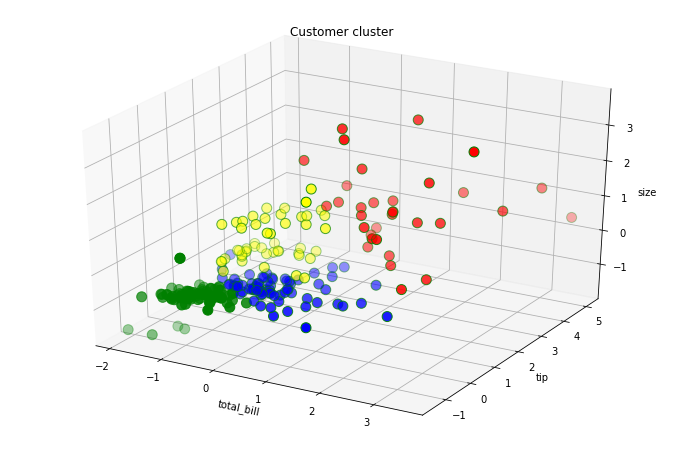

In [ ]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(new_df['total_bill'][new_df.label3_kmeans==0], new_df['tip'][new_df.label3_kmeans==0], new_df['size'][new_df.label3_kmeans==0], c='blue', s=100, edgecolors='green')
ax.scatter(new_df['total_bill'][new_df.label3_kmeans==1], new_df['tip'][new_df.label3_kmeans==1], new_df['size'][new_df.label3_kmeans==1], c='red', s=100, edgecolors='green')
ax.scatter(new_df['total_bill'][new_df.label3_kmeans==2], new_df['tip'][new_df.label3_kmeans==2], new_df['size'][new_df.label3_kmeans==2], c='green', s=100, edgecolors='green')
ax.scatter(new_df['total_bill'][new_df.label3_kmeans==3], new_df['tip'][new_df.label3_kmeans==3], new_df['size'][new_df.label3_kmeans==3], c='yellow', s=100, edgecolors='green')

# plt.scatter(kmeans2.cluster_centers_[:,0], kmeans2.cluster_centers_[:,1], c='k', s=300)
plt.title('Customer cluster')
plt.xlabel('total_bill')
plt.ylabel('tip')
ax.set_zlabel('size')
plt.show()